 <h2><i><p style = "color : Purple"><strong> CAPSTONE PROJECT - Python </strong></p></style></i></h2>


# Task 1
There are three different tables as given above. Please make three dataframe in python and save them as three .csv files. 
From Task 2 to Task 10, use the saved .csv files only.


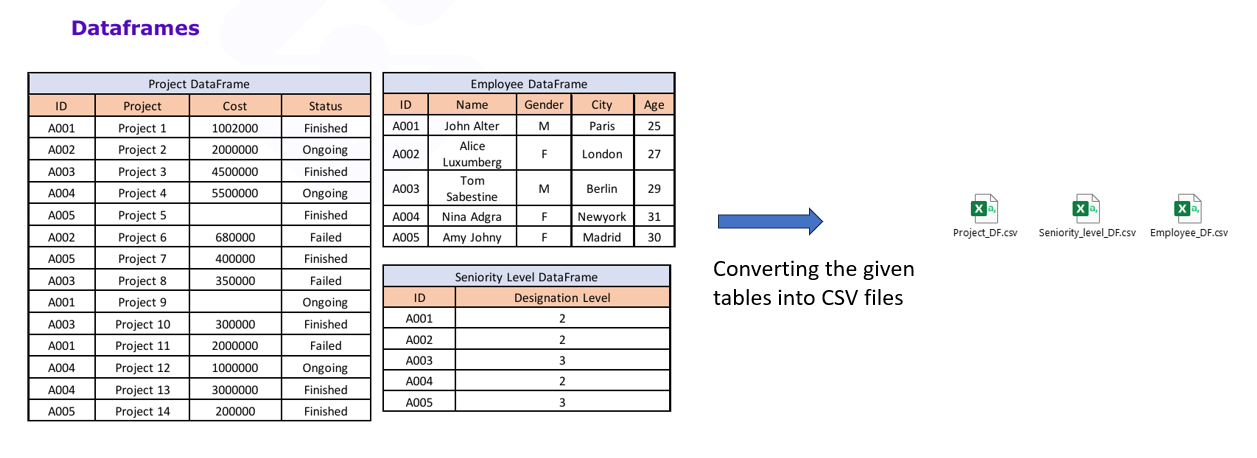

In [7]:
import pandas as pd

# 1. Read the original files into DataFrames
df_employee = pd.read_csv('Employee_DF.csv')
df_project = pd.read_csv('Project_DF.csv')
df_seniority = pd.read_csv('Seniority_level_DF.csv')

# 2. Save them as the new CSV files to be used for Tasks 2-10
df_employee.to_csv('Employee_Table.csv', index=False)
df_project.to_csv('Project_Table.csv', index=False)
df_seniority.to_csv('Seniority_Table.csv', index=False)

print("Task 1 Complete: Files saved as CSV: Employee_Table.csv, Project_Table.csv, and Seniority_Table.csv")

Task 1 Complete: Files saved as CSV: Employee_Table.csv, Project_Table.csv, and Seniority_Table.csv


<h4><i><p style = "color : Purple"><strong> OR [entering the data Manually]: </strong></p></style></i></h4>

In [8]:
import pandas as pd

# Create Seniority Level DataFrame
seniority_data = {
    "ID": ["A001","A002","A003","A004","A005"],
    "Designation Level": [2,2,3,2,3]
}
seniority_df = pd.DataFrame(seniority_data)
seniority_df.to_csv("Seniority_Level_DF.csv", index=False)

# Create Employee DataFrame
employee_data = {
    "ID": ["A001","A002","A003","A004","A005"],
    "Name": ["John Alter","Alice Luxumberg","Tom Sabestine","Nina Adgra","Amy Johny"],
    "Gender": ["M","F","M","F","F"],
    "City": ["Paris","London","Berlin","Newyork","Madrid"],
    "Age": [25,27,29,31,30]
}
employee_df = pd.DataFrame(employee_data)
employee_df.to_csv("Employee_DF.csv", index=False)

# Create Project DataFrame
project_data = {
    "ID": ["A001","A002","A003","A004","A005","A002","A005","A003","A001","A003","A001","A004","A004","A005"],
    "Project": ["Project 1","Project 2","Project 3","Project 4","Project 5","Project 6","Project 7","Project 8",
"Project 9","Project 10","Project 11","Project 12","Project 13","Project 14"],
    "Cost": [1002000,2000000,4500000,5500000,None,680000,400000,350000,None,300000,2000000,1000000,3000000,
200000],
    "Status": ["Finished","Ongoing","Finished","Ongoing","Finished","Failed","Finished",
               "Failed","Ongoing","Finished","Failed","Ongoing","Finished","Finished"]
}
project_df = pd.DataFrame(project_data)
project_df.to_csv("Project_DF.csv", index=False)

print("All three CSV files created successfully!")

All three CSV files created successfully!


# Task 2
The cost column in the dataframe “Project” has some missing values. Your task is to compute these missing values. 
Replace the missing values by running average. You should use the “For” loop for this task.


In [9]:
import pandas as pd

# 1. Load the data
df_project = pd.read_csv('Project_Table.csv')

# 2. Set the display format for the grid (Commas and no decimals)
pd.set_option('display.float_format', '{:,.0f}'.format)

# 3. Task 2 Logic: Running Average Calculation
running_sum = 0
running_count = 0
for i in range(len(df_project)):
    cost_val = df_project.loc[i, 'Cost']
    if pd.isna(cost_val):
        if running_count > 0:
            df_project.at[i, 'Cost'] = running_sum / running_count
        else:
            df_project.at[i, 'Cost'] = 0
    else:
        running_sum += cost_val
        running_count += 1

# 4. Save the data
df_project.to_csv('Project_Table.csv', index=False)

# 5. DISPLAY AS GRID
# Just call the variable name as the last line to see the formatted grid
df_project[['ID', 'Project', 'Cost', 'Status']]

,ID,Project,Cost,Status
0,A001,Project 1,"1,002,000",Finished
1,A002,Project 2,"2,000,000",Ongoing
2,A003,Project 3,"4,500,000",Finished
3,A004,Project 4,"5,500,000",Ongoing
4,A005,Project 5,"3,250,500",Finished
5,A002,Project 6,"680,000",Failed
6,A005,Project 7,"400,000",Finished
7,A003,Project 8,"350,000",Failed
8,A001,Project 9,"2,061,714",Ongoing
9,A003,Project 10,"300,000",Finished


# Task 3
Split the name column in the Employee dataframe into two new columns “First Name”,
and “LastName” and remove the older “name” column.


In [10]:
import pandas as pd

# 1. Load the file (Ensure this line is NOT commented out)
df_employee = pd.read_csv('Employee_Table.csv')

# 2. Check if 'Name' exists before trying to split it
if 'Name' in df_employee.columns:
    # Split Name into First Name and Last Name
    df_employee[['First Name', 'Last Name']] = df_employee['Name'].str.split(' ', n=1, expand=True)
    
    # 3. Remove the original Name column
    df_employee.drop(columns=['Name'], inplace=True)
    
    # 4. Save the updated file
    df_employee.to_csv('Employee_Table.csv', index=False)
    print("Task 3: Name column split and saved successfully.")
else:
    print("Note: The 'Name' column was already split in a previous run.")

# 5. Display as Grid
df_employee

Task 3: Name column split and saved successfully.


,ID,Gender,City,Age,First Name,Last Name
0,A001,M,Paris,25,John,Alter
1,A002,F,London,27,Alice,Luxumberg
2,A003,M,Berlin,29,Tom,Sabestine
3,A004,F,Newyork,31,Nina,Adgra
4,A005,F,Madrid,30,Amy,Johny


# Task 4
Join all three dataframes in one single dataframe. Name it “Final”

In [11]:
# 1. Join all three dataframes on 'ID'
# We name the resulting dataframe "Final" as per instructions
Final = pd.merge(df_employee, df_seniority, on='ID')
Final = pd.merge(Final, df_project, on='ID')

# 2. Save the result
Final.to_csv('Final.csv', index=False)

# 3. Format for Grid display (No 'e', No decimals, with commas)
pd.set_option('display.float_format', '{:,.0f}'.format)

# 4. Display as Grid
Final

,ID,Gender,City,Age,First Name,Last Name,Designation Level,Project,Cost,Status
0,A001,M,Paris,25,John,Alter,2,Project 1,"1,002,000",Finished
1,A001,M,Paris,25,John,Alter,2,Project 9,"2,061,714",Ongoing
2,A001,M,Paris,25,John,Alter,2,Project 11,"2,000,000",Failed
3,A002,F,London,27,Alice,Luxumberg,2,Project 2,"2,000,000",Ongoing
4,A002,F,London,27,Alice,Luxumberg,2,Project 6,"680,000",Failed
5,A003,M,Berlin,29,Tom,Sabestine,3,Project 3,"4,500,000",Finished
6,A003,M,Berlin,29,Tom,Sabestine,3,Project 8,"350,000",Failed
7,A003,M,Berlin,29,Tom,Sabestine,3,Project 10,"300,000",Finished
8,A004,F,Newyork,31,Nina,Adgra,2,Project 4,"5,500,000",Ongoing
9,A004,F,Newyork,31,Nina,Adgra,2,Project 12,"1,000,000",Ongoing


# Task 5
Add a new bonus column in the Final dataframe. Give a 5% bonus concerning project cost only to employees who have finished the projects.


In [12]:
import numpy as np

# 1. Load the Final dataframe
Final = pd.read_csv('Final.csv')

# 2. Add Bonus column: 5% of Cost if Status is 'Finished', else 0
Final['Bonus'] = np.where(Final['Status'] == 'Finished', Final['Cost'] * 0.05, 0)

# 3. Format Bonus as integer (remove decimals)
Final['Bonus'] = Final['Bonus'].round().astype(int)

# 4. Save the updated file
Final.to_csv('Final.csv', index=False)

# 5. Display with comma formatting and as Grid
pd.set_option('display.float_format', '{:,.0f}'.format)
Final

,ID,Gender,City,Age,First Name,Last Name,Designation Level,Project,Cost,Status,Bonus
0,A001,M,Paris,25,John,Alter,2,Project 1,"1,002,000",Finished,50100
1,A001,M,Paris,25,John,Alter,2,Project 9,"2,061,714",Ongoing,0
2,A001,M,Paris,25,John,Alter,2,Project 11,"2,000,000",Failed,0
3,A002,F,London,27,Alice,Luxumberg,2,Project 2,"2,000,000",Ongoing,0
4,A002,F,London,27,Alice,Luxumberg,2,Project 6,"680,000",Failed,0
5,A003,M,Berlin,29,Tom,Sabestine,3,Project 3,"4,500,000",Finished,225000
6,A003,M,Berlin,29,Tom,Sabestine,3,Project 8,"350,000",Failed,0
7,A003,M,Berlin,29,Tom,Sabestine,3,Project 10,"300,000",Finished,15000
8,A004,F,Newyork,31,Nina,Adgra,2,Project 4,"5,500,000",Ongoing,0
9,A004,F,Newyork,31,Nina,Adgra,2,Project 12,"1,000,000",Ongoing,0


# Task 6
Demote the designation level by 1, whose projects have status “fail”. Delete the employees record whose designation level is above 4.


In [13]:
import pandas as pd

# 1. Load the Final dataframe
Final = pd.read_csv('Final.csv')

# 2. Demote designation level by 1 for records with "Failed" status
# (Adding 1 to the level demotes them on the 1-4 scale)
Final.loc[Final['Status'] == 'Failed', 'Designation Level'] += 1

# 3. Delete records where Designation Level is above 4
Final = Final[Final['Designation Level'] <= 4]

# 4. Save the updated dataframe
Final.to_csv('Final.csv', index=False)

# 5. Display as Grid
pd.set_option('display.float_format', '{:,.0f}'.format)
Final

,ID,Gender,City,Age,First Name,Last Name,Designation Level,Project,Cost,Status,Bonus
0,A001,M,Paris,25,John,Alter,2,Project 1,"1,002,000",Finished,50100
1,A001,M,Paris,25,John,Alter,2,Project 9,"2,061,714",Ongoing,0
2,A001,M,Paris,25,John,Alter,3,Project 11,"2,000,000",Failed,0
3,A002,F,London,27,Alice,Luxumberg,2,Project 2,"2,000,000",Ongoing,0
4,A002,F,London,27,Alice,Luxumberg,3,Project 6,"680,000",Failed,0
5,A003,M,Berlin,29,Tom,Sabestine,3,Project 3,"4,500,000",Finished,225000
6,A003,M,Berlin,29,Tom,Sabestine,4,Project 8,"350,000",Failed,0
7,A003,M,Berlin,29,Tom,Sabestine,3,Project 10,"300,000",Finished,15000
8,A004,F,Newyork,31,Nina,Adgra,2,Project 4,"5,500,000",Ongoing,0
9,A004,F,Newyork,31,Nina,Adgra,2,Project 12,"1,000,000",Ongoing,0


# Task 7
Add “Mr.” and “Mrs.” to the first name column and drop the gender column.


In [14]:
import pandas as pd

# 1. Load the Final dataframe
Final = pd.read_csv('Final.csv')

# 2. Add "Mr." and "Mrs." based on the Gender column
# We apply a condition: 'Mr.' for 'M' and 'Mrs.' for 'F'
Final['First Name'] = Final.apply(
    lambda row: 'Mr. ' + row['First Name'] if row['Gender'] == 'M' else 'Mrs. ' + row['First Name'], 
    axis=1
)

# 3. Drop the Gender column as it is no longer needed
Final.drop(columns=['Gender'], inplace=True)

# 4. Save the updated dataframe
Final.to_csv('Final.csv', index=False)

# 5. Display as Grid
pd.set_option('display.float_format', '{:,.0f}'.format)
Final

,ID,City,Age,First Name,Last Name,Designation Level,Project,Cost,Status,Bonus
0,A001,Paris,25,Mr. John,Alter,2,Project 1,"1,002,000",Finished,50100
1,A001,Paris,25,Mr. John,Alter,2,Project 9,"2,061,714",Ongoing,0
2,A001,Paris,25,Mr. John,Alter,3,Project 11,"2,000,000",Failed,0
3,A002,London,27,Mrs. Alice,Luxumberg,2,Project 2,"2,000,000",Ongoing,0
4,A002,London,27,Mrs. Alice,Luxumberg,3,Project 6,"680,000",Failed,0
5,A003,Berlin,29,Mr. Tom,Sabestine,3,Project 3,"4,500,000",Finished,225000
6,A003,Berlin,29,Mr. Tom,Sabestine,4,Project 8,"350,000",Failed,0
7,A003,Berlin,29,Mr. Tom,Sabestine,3,Project 10,"300,000",Finished,15000
8,A004,Newyork,31,Mrs. Nina,Adgra,2,Project 4,"5,500,000",Ongoing,0
9,A004,Newyork,31,Mrs. Nina,Adgra,2,Project 12,"1,000,000",Ongoing,0


# Task 8
Promote designation level by 1 for the employees whose age is more than 29 years using IF condition.


In [15]:
import pandas as pd

# 1. Load the Final dataframe
Final = pd.read_csv('Final.csv')

# 2. Loop through the dataframe and apply promotions using an IF condition
for i in range(len(Final)):
    # Check if age is more than 29
    if Final.loc[i, 'Age'] > 29:
        # Promote by decreasing the level number (minimum level is 1)
        if Final.loc[i, 'Designation Level'] > 1:
            Final.at[i, 'Designation Level'] -= 1

# 3. Save the updated dataframe
Final.to_csv('Final.csv', index=False)

# 4. Display as Grid
pd.set_option('display.float_format', '{:,.0f}'.format)
Final

,ID,City,Age,First Name,Last Name,Designation Level,Project,Cost,Status,Bonus
0,A001,Paris,25,Mr. John,Alter,2,Project 1,"1,002,000",Finished,50100
1,A001,Paris,25,Mr. John,Alter,2,Project 9,"2,061,714",Ongoing,0
2,A001,Paris,25,Mr. John,Alter,3,Project 11,"2,000,000",Failed,0
3,A002,London,27,Mrs. Alice,Luxumberg,2,Project 2,"2,000,000",Ongoing,0
4,A002,London,27,Mrs. Alice,Luxumberg,3,Project 6,"680,000",Failed,0
5,A003,Berlin,29,Mr. Tom,Sabestine,3,Project 3,"4,500,000",Finished,225000
6,A003,Berlin,29,Mr. Tom,Sabestine,4,Project 8,"350,000",Failed,0
7,A003,Berlin,29,Mr. Tom,Sabestine,3,Project 10,"300,000",Finished,15000
8,A004,Newyork,31,Mrs. Nina,Adgra,1,Project 4,"5,500,000",Ongoing,0
9,A004,Newyork,31,Mrs. Nina,Adgra,1,Project 12,"1,000,000",Ongoing,0


# Task 9
Add the cost of all projects for each Employee and save it in new dataframe
“TotalProjCost” with three columns ID, First Name, and Total cost


In [16]:
import pandas as pd

# 1. Load the Final dataframe
Final = pd.read_csv('Final.csv')

# 2. Group by ID and First Name, then sum the Cost
TotalProjCost = Final.groupby(['ID', 'First Name'])['Cost'].sum().reset_index()

# 3. Rename the aggregated column to "Totalcost"
TotalProjCost.rename(columns={'Cost': 'Totalcost'}, inplace=True)

# 4. Remove decimals/scientific notation
TotalProjCost['Totalcost'] = TotalProjCost['Totalcost'].round().astype(int)

# 5. Save the new dataframe (raw numbers)
TotalProjCost.to_csv('TotalProjCost.csv', index=False)

# 6. Display as Grid with Comma Separation
# Using .style.format ensures the integer column shows thousand separators
TotalProjCost.style.format({"Totalcost": "{:,}"})

,ID,First Name,Totalcost
0,A001,Mr. John,"5,063,714"
1,A002,Mrs. Alice,"2,680,000"
2,A003,Mr. Tom,"5,150,000"
3,A004,Mrs. Nina,"9,500,000"
4,A005,Mrs. Amy,"3,850,500"


# Task 10
Print all the employee details whose city name contains the letter “o” in it.


In [17]:
import pandas as pd

# 1. Load the Final dataframe
Final = pd.read_csv('Final.csv')

# 2. Filter for city names containing the letter 'o' (case-insensitive)
# This will pick up cities like London and Newyork
result_task10 = Final[Final['City'].str.contains('o', case=False, na=False)]

# 3. Display as Grid with Comma Separation for money columns
# We apply the formatting to Cost and Bonus to keep it clean
result_task10.style.format({
    "Cost": "{:,}",
    "Bonus": "{:,}"
})

,ID,City,Age,First Name,Last Name,Designation Level,Project,Cost,Status,Bonus
3,A002,London,27,Mrs. Alice,Luxumberg,2,Project 2,"2,000,000.0",Ongoing,0
4,A002,London,27,Mrs. Alice,Luxumberg,3,Project 6,"680,000.0",Failed,0
8,A004,Newyork,31,Mrs. Nina,Adgra,1,Project 4,"5,500,000.0",Ongoing,0
9,A004,Newyork,31,Mrs. Nina,Adgra,1,Project 12,"1,000,000.0",Ongoing,0
10,A004,Newyork,31,Mrs. Nina,Adgra,1,Project 13,"3,000,000.0",Finished,"150,000"
